In [1]:
# import dask.dataframe as dd
# this should whatever your locomizer data file is
#%time temp = dd.read_csv("../data/sample/signals_set_2.csv")
import pandas as pd

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
# import pyarrow.parquet as pq
# import pyarrow.dataset as ds
# import pyarrow.compute as pc
# import pyarrow.feather as ft

In [26]:
from geopy.geocoders import Nominatim
import folium
import time

In [22]:
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_4484/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [117]:
inv = pd.read_csv('data/INV_IPC_SECTION_prior.csv')
inv.head()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year
0,EP19780100247,16427314.0,344.0,2214446.0,"Bruton, Edwin John","9 Dunheved Road,Launceston, Cornwall",UKK30,GB,1.0,1.0,1978.0,E,1977
1,EP19780100395,16427449.0,520.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1.0,1.0,1978.0,A,1977
2,EP19780100395,16427449.0,520.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1.0,1.0,1978.0,C,1977
3,EP19780100400,16427452.0,522.0,47138519.0,"Turner, George Frederick Albert","'Monks Acres' Woolmongers Lane Blackmore,Ingat...",UKH33,GB,1.0,1.0,1978.0,G,1977
4,EP19780100463,16427512.0,559.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1.0,1.0,1978.0,A,1977


In [118]:
len(inv)

265426

In [119]:
inv = inv.drop_duplicates(subset=['appln_id'])  

In [120]:
len(inv)

194644

In [123]:
inv = inv.drop_duplicates(subset=['app_nbr', 'IPC_Section'])  

In [124]:
len(inv)

194644

In [75]:
inv.head()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year
0,EP19780100247,16427314.0,344.0,2214446.0,"Bruton, Edwin John","9 Dunheved Road,Launceston, Cornwall",UKK30,GB,1.0,1.0,1978.0,E,1977
1,EP19780100395,16427449.0,520.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1.0,1.0,1978.0,A,1977
3,EP19780100400,16427452.0,522.0,47138519.0,"Turner, George Frederick Albert","'Monks Acres' Woolmongers Lane Blackmore,Ingat...",UKH33,GB,1.0,1.0,1978.0,G,1977
4,EP19780100463,16427512.0,559.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1.0,1.0,1978.0,A,1977
6,EP19780100492,16427540.0,576.0,2214948.0,"Barber, Bernard","3 Little Street,Yardley Hastings Northants",UKJ22,GB,1.0,1.0,1978.0,B,1977


In [76]:
print(inv['IPC_Section'].unique())

['E' 'A' 'G' 'B' 'C' 'D' 'H' 'F']


In [125]:

grouped_inv = inv.groupby(['IPC_Section', 'prio_year']).size().reset_index(name='Count')

print(grouped_inv.head(10))


  IPC_Section  prio_year  Count
0           A       1977     95
1           A       1978    298
2           A       1979    336
3           A       1980    419
4           A       1981    497
5           A       1982    528
6           A       1983    561
7           A       1984    634
8           A       1985    693
9           A       1986    776


In [126]:
len(grouped_inv)

335

In [127]:
inv_dic = dict(tuple(grouped_inv.groupby('IPC_Section')))

In [128]:
IPC_A = inv_dic['A']
IPC_B = inv_dic['B']
IPC_C = inv_dic['C']
IPC_D = inv_dic['D']
IPC_E = inv_dic['E']
IPC_F = inv_dic['F']
IPC_G = inv_dic['G']
IPC_H = inv_dic['H']

In [129]:
print(IPC_A['prio_year'].unique())
# print(IPC_B['app_year'].unique())
# print(IPC_C['app_year'].unique())
# print(IPC_D['app_year'].unique())
# print(IPC_E['app_year'].unique())
# print(IPC_F['app_year'].unique())
# print(IPC_G['app_year'].unique())
# print(IPC_H['app_year'].unique())

[1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [130]:
IPC_A

,IPC_Section,prio_year,Count
0,A,1977,95
1,A,1978,298
2,A,1979,336
3,A,1980,419
4,A,1981,497
5,A,1982,528
6,A,1983,561
7,A,1984,634
8,A,1985,693
9,A,1986,776


In [90]:
type(IPC_A['prio_year'])

pandas.core.series.Series

In [133]:
IPC_A['prio_year'] = IPC_A['prio_year'].astype(int).astype(str)
IPC_B['prio_year'] = IPC_B['prio_year'].astype(int).astype(str)
IPC_C['prio_year'] = IPC_C['prio_year'].astype(int).astype(str)
IPC_D['prio_year'] = IPC_D['prio_year'].astype(int).astype(str)
IPC_E['prio_year'] = IPC_E['prio_year'].astype(int).astype(str)
IPC_F['prio_year'] = IPC_F['prio_year'].astype(int).astype(str)
IPC_G['prio_year'] = IPC_G['prio_year'].astype(int).astype(str)
IPC_H['prio_year'] = IPC_H['prio_year'].astype(int).astype(str)


IPC_A = IPC_A[IPC_A['prio_year'] != '2018']
IPC_B = IPC_B[IPC_B['prio_year'] != '2018']
IPC_C = IPC_C[IPC_C['prio_year'] != '2018']
IPC_D = IPC_D[IPC_D['prio_year'] != '2018']
IPC_E = IPC_E[IPC_E['prio_year'] != '2018']
IPC_F = IPC_F[IPC_F['prio_year'] != '2018']
IPC_G = IPC_G[IPC_G['prio_year'] != '2018']
IPC_H = IPC_H[IPC_H['prio_year'] != '2018']

/tmp/ipykernel_169/2069866769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_A['prio_year'] = IPC_A['prio_year'].astype(int).astype(str)
/tmp/ipykernel_169/2069866769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_B['prio_year'] = IPC_B['prio_year'].astype(int).astype(str)
/tmp/ipykernel_169/2069866769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [134]:
IPC_A = IPC_A[IPC_A['prio_year'] != '2017']
IPC_B = IPC_B[IPC_B['prio_year'] != '2017']
IPC_C = IPC_C[IPC_C['prio_year'] != '2017']
IPC_D = IPC_D[IPC_D['prio_year'] != '2017']
IPC_E = IPC_E[IPC_E['prio_year'] != '2017']
IPC_F = IPC_F[IPC_F['prio_year'] != '2017']
IPC_G = IPC_G[IPC_G['prio_year'] != '2017']
IPC_H = IPC_H[IPC_H['prio_year'] != '2017']

In [135]:
IPC_E

,IPC_Section,prio_year,Count
167,E,1977,8
168,E,1978,37
169,E,1979,62
170,E,1980,82
171,E,1981,103
172,E,1982,115
173,E,1983,135
174,E,1984,151
175,E,1985,152
176,E,1986,140


In [18]:
import matplotlib.pyplot as plt

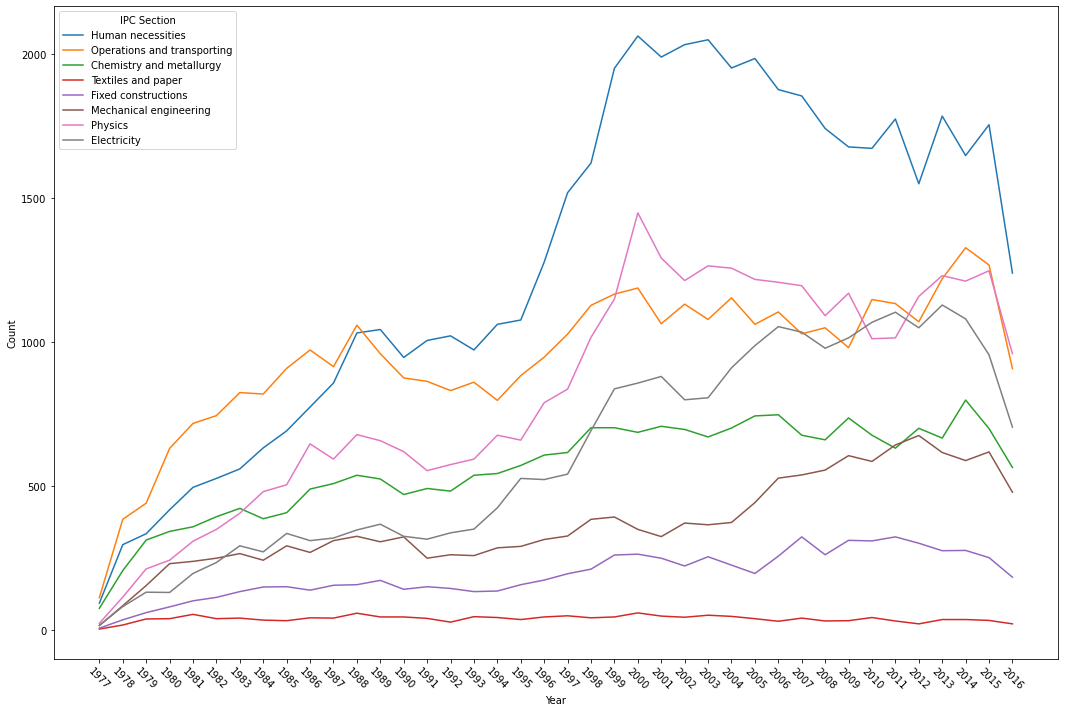

In [231]:
plt.figure(figsize=(18, 12))

# Plot each dataframe
plt.plot(IPC_A['prio_year'], IPC_A['Count'], label='Human necessities')
plt.plot(IPC_B['prio_year'], IPC_B['Count'], label='Operations and transporting')
plt.plot(IPC_C['prio_year'], IPC_C['Count'], label='Chemistry and metallurgy')
plt.plot(IPC_D['prio_year'], IPC_D['Count'], label='Textiles and paper')
plt.plot(IPC_E['prio_year'], IPC_E['Count'], label='Fixed constructions')
plt.plot(IPC_F['prio_year'], IPC_F['Count'], label='Mechanical engineering')
plt.plot(IPC_G['prio_year'], IPC_G['Count'], label='Physics')
plt.plot(IPC_H['prio_year'], IPC_H['Count'], label='Electricity')

# Create a legend
plt.legend(title='IPC Section')

# Label axes
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=-45)
# Show the plot
plt.show()


In [137]:
import re

# regex pattern for UK postcodes
postcode_regex = r"[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}"

# keep only rows where 'address' matches the postcode pattern
inv_post = inv[inv['address'].str.contains(postcode_regex, na=False)]


In [138]:
len(inv_post)

164945

In [99]:
print(inv_post.head())

          app_nbr    appln_id  pub_nbr   person_id  \
3   EP19780100400  16427452.0    522.0  47138519.0   
52  EP19780200076  16428913.0    237.0   2217720.0   
59  EP19780200236  16429060.0   1659.0   2217967.0   
71  EP19780300002  16429215.0      3.0   2218230.0   
76  EP19780300016  16429227.0   5702.0   2218261.0   

                           inv_name  \
3   Turner, George Frederick Albert   
52              Ellson, Allan Henry   
59               Brook, Neil Rodney   
71                    Hatch, George   
76           Lucas, James Frederick   

                                              address reg_code ctry_code  \
3   'Monks Acres' Woolmongers Lane Blackmore,Ingat...    UKH33        GB   
52  c/o Philips Patent Department Berkshire House,...    UKI11        GB   
59  C/O PHILIPS Ltd. PATENT DEPT. Berkshire house,...    UKI11        GB   
71  23 Grimshaw Avenue,Failsworth, Manchaster M35 9JT    UKD32        GB   
76            9, New Road,South Darenth Kent. DA4 9AT    UKJ

In [139]:
# inv_post['postcode'] = inv_post['address'].apply(lambda x: ' '.join(x.split()[-2:]))


pattern = r'[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}' # regex pattern for UK postcodes
inv_post['postcode'] = inv_post['address'].apply(lambda x: re.findall(pattern, x.upper()))


inv_post['postcode'] = inv_post['postcode'].apply(lambda x: x[0] if x else None)


/tmp/ipykernel_169/835486536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_post['postcode'] = inv_post['address'].apply(lambda x: re.findall(pattern, x.upper()))
/tmp/ipykernel_169/835486536.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_post['postcode'] = inv_post['postcode'].apply(lambda x: x[0] if x else None)


In [110]:
inv_post.head(10)

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode
3,EP19780100400,16427452.0,522.0,47138519.0,"Turner, George Frederick Albert","'Monks Acres' Woolmongers Lane Blackmore,Ingat...",UKH33,GB,1.0,1.0,1978.0,G,1977,CM4 0JX
52,EP19780200076,16428913.0,237.0,2217720.0,"Ellson, Allan Henry","c/o Philips Patent Department Berkshire House,...",UKI11,GB,1.0,1.0,1978.0,A,1977,WC1V 7AQ
59,EP19780200236,16429060.0,1659.0,2217967.0,"Brook, Neil Rodney","C/O PHILIPS Ltd. PATENT DEPT. Berkshire house,...",UKI11,GB,1.0,0.5,1978.0,B,1977,WC1V 7AQ
71,EP19780300002,16429215.0,3.0,2218230.0,"Hatch, George","23 Grimshaw Avenue,Failsworth, Manchaster M35 9JT",UKD32,GB,1.0,1.0,1978.0,E,1977,M35 9JT
76,EP19780300016,16429227.0,5702.0,2218261.0,"Lucas, James Frederick","9, New Road,South Darenth Kent. DA4 9AT",UKJ42,GB,1.0,1.0,1978.0,B,1978,DA4 9AT
102,EP19780300078,16429285.0,273.0,2218388.0,"Smith, David Banyard","Cromwell House Frankton,Rugby Warwickshire CV2...",UKG13,GB,1.0,1.0,1978.0,B,1977,CV23 9NZ
118,EP19780300111,16429318.0,290.0,2218466.0,"Wilson, Alexander Ian","14 Whiteley Lane Fulwood,Sheffield S10 4GL Yor...",UKE32,GB,1.0,1.0,1978.0,B,1977,S10 4GL
124,EP19780300117,16429324.0,627.0,2218477.0,"Joyce, Michael Fred","25 Rangewood Avenue Kennet Valley,Reading RG3 ...",UKJ11,GB,1.0,1.0,1978.0,B,1977,RG3 3NN
125,EP19780300118,16429325.0,431.0,2218478.0,"Preedy, John Edward","BP. Research Centre Chertsey Road,Sunbury-on-T...",UKJ23,GB,1.0,1.0,1978.0,A,1977,TW16 7LN
142,EP19780300144,16429351.0,806.0,2218530.0,"Dale, Robin John","Douglas Road,Kingswood Bristol, BS15 2NL",UKK12,GB,1.0,1.0,1978.0,B,1977,BS15 2NL


In [116]:
inv_post.to_csv('INV_POST_Section.csv', index=False)

In [161]:
inv_post = pd.read_csv('INV_POST_Section.csv')

In [162]:
print(inv_post['postcode'].iloc[5]) # replace 0 with the index of the cell you want to check


CV23 9NZ


In [140]:
# inv_post['postcode'] = inv_post['postcode'].str.replace('\n', '')

In [163]:
len(inv_post)

164945

In [164]:
mis = inv_post['postcode'].isnull().sum()
mis

0

In [56]:
import requests

In [142]:
def get_coordinates(postcode):
    response = requests.get(f"http://api.postcodes.io/postcodes/{postcode}")

    if response.status_code == 200:  # successful request
        data = response.json()['result']
        return pd.Series([data['latitude'], data['longitude']])
    else:
        return pd.Series([None, None])

In [143]:
# inv_post[['latitude', 'longitude']] = inv_post['postcode'].apply(get_coordinates)

In [182]:
# zip_1977 = inv_post[inv_post['prio_year'] == 1977]
zip_dict = {}

for i in range(1977, 2019):
    zip_dict['zip_' + str(i)] = inv_post[inv_post['prio_year'] == i]
    print('There are ' + str(len(zip_dict['zip_' + str(i)])) +' rows in ' + str(i))
# len(zip_1977)

There are 64 rows in 1977
There are 228 rows in 1978
There are 385 rows in 1979
There are 512 rows in 1980
There are 669 rows in 1981
There are 857 rows in 1982
There are 1202 rows in 1983
There are 1435 rows in 1984
There are 1633 rows in 1985
There are 1956 rows in 1986
There are 2167 rows in 1987
There are 2742 rows in 1988
There are 3005 rows in 1989
There are 3071 rows in 1990
There are 3104 rows in 1991
There are 3267 rows in 1992
There are 3357 rows in 1993
There are 3680 rows in 1994
There are 3910 rows in 1995
There are 4381 rows in 1996
There are 4782 rows in 1997
There are 5417 rows in 1998
There are 6073 rows in 1999
There are 6430 rows in 2000
There are 6066 rows in 2001
There are 6068 rows in 2002
There are 6080 rows in 2003
There are 6205 rows in 2004
There are 6221 rows in 2005
There are 6366 rows in 2006
There are 6291 rows in 2007
There are 5936 rows in 2008
There are 6122 rows in 2009
There are 6092 rows in 2010
There are 6302 rows in 2011
There are 6238 rows in 2012

In [178]:
zip_dict['zip_2017'].head()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode
157713,EP20170000163,475005415.0,3355018.0,57757621.0,"Ware, Adrian","6 Ty-Isaf Park Villas,Risca, Gwent NP11 6ND",UKL16,GB,1.0,0.125,2017.0,F,2017,NP11 6ND
157725,EP20170001648,484709400.0,3466524.0,69889041.0,"Magazov, Salavat","43 Chiltern View,Letchworth, SG6 3RJ",UKH23,GB,1.0,1.000,2017.0,B,2017,SG6 3RJ
157726,EP20170001651,484709406.0,3467309.0,69829976.0,"Betts, John Paul James","48B Upper Tollington Park,London, N4 4BX",UKI12,GB,1.0,0.500,2017.0,F,2017,N4 4BX
157727,EP20170001652,484709408.0,3466523.0,69887958.0,"Bargh, Adrian Neil","46 Heathfield,Royston, Herts SG8 5BN",UKH23,GB,1.0,1.000,2017.0,B,2017,SG8 5BN
157730,EP20170020079,475897292.0,3369413.0,57722644.0,"James, Leanne Marie","38 Stanford Hill,LOUGHBOROUGH, Leicestershire ...",UKF22,GB,1.0,0.500,2017.0,A,2017,LE11 1LX


In [190]:
zip_dict['zip_1977'][['latitude', 'longitude']] = zip_dict['zip_1977']['postcode'].apply(get_coordinates)

In [189]:
pd.options.mode.chained_assignment = None


In [191]:
%time zip_dict['zip_1978'][['latitude', 'longitude']] = zip_dict['zip_1978']['postcode'].apply(get_coordinates)

CPU times: user 2.27 s, sys: 97.8 ms, total: 2.37 s
Wall time: 15.2 s


In [192]:
%time zip_dict['zip_1979'][['latitude', 'longitude']] = zip_dict['zip_1979']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1980'][['latitude', 'longitude']] = zip_dict['zip_1980']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1981'][['latitude', 'longitude']] = zip_dict['zip_1981']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1982'][['latitude', 'longitude']] = zip_dict['zip_1982']['postcode'].apply(get_coordinates)

CPU times: user 3.66 s, sys: 142 ms, total: 3.8 s
Wall time: 23.6 s
CPU times: user 4.63 s, sys: 205 ms, total: 4.84 s
Wall time: 30 s
CPU times: user 6.15 s, sys: 228 ms, total: 6.38 s
Wall time: 40.1 s
CPU times: user 7.95 s, sys: 315 ms, total: 8.26 s
Wall time: 51.3 s


In [194]:
%time zip_dict['zip_1983'][['latitude', 'longitude']] = zip_dict['zip_1983']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1984'][['latitude', 'longitude']] = zip_dict['zip_1984']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1985'][['latitude', 'longitude']] = zip_dict['zip_1985']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1986'][['latitude', 'longitude']] = zip_dict['zip_1986']['postcode'].apply(get_coordinates)

CPU times: user 14.7 s, sys: 579 ms, total: 15.3 s
Wall time: 1min 39s
CPU times: user 17.3 s, sys: 684 ms, total: 18 s
Wall time: 1min 59s
CPU times: user 19.7 s, sys: 794 ms, total: 20.5 s
Wall time: 2min 14s
CPU times: user 23.1 s, sys: 930 ms, total: 24 s
Wall time: 2min 38s


In [195]:
%time zip_dict['zip_1987'][['latitude', 'longitude']] = zip_dict['zip_1987']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1988'][['latitude', 'longitude']] = zip_dict['zip_1988']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1989'][['latitude', 'longitude']] = zip_dict['zip_1989']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1990'][['latitude', 'longitude']] = zip_dict['zip_1990']['postcode'].apply(get_coordinates)

CPU times: user 25.7 s, sys: 943 ms, total: 26.7 s
Wall time: 2min 55s
CPU times: user 32.9 s, sys: 1.28 s, total: 34.2 s
Wall time: 3min 46s
CPU times: user 35.1 s, sys: 1.34 s, total: 36.5 s
Wall time: 4min 3s
CPU times: user 34.7 s, sys: 1.44 s, total: 36.2 s
Wall time: 3min 58s


In [197]:
%time zip_dict['zip_1991'][['latitude', 'longitude']] = zip_dict['zip_1991']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1992'][['latitude', 'longitude']] = zip_dict['zip_1992']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1993'][['latitude', 'longitude']] = zip_dict['zip_1993']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1994'][['latitude', 'longitude']] = zip_dict['zip_1994']['postcode'].apply(get_coordinates)

CPU times: user 36.6 s, sys: 1.55 s, total: 38.1 s
Wall time: 4min 9s
CPU times: user 37.4 s, sys: 1.49 s, total: 38.9 s
Wall time: 4min 11s
CPU times: user 39.1 s, sys: 1.59 s, total: 40.7 s
Wall time: 4min 16s
CPU times: user 41.5 s, sys: 1.77 s, total: 43.3 s
Wall time: 4min 32s


In [198]:
%time zip_dict['zip_1995'][['latitude', 'longitude']] = zip_dict['zip_1995']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1996'][['latitude', 'longitude']] = zip_dict['zip_1996']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1997'][['latitude', 'longitude']] = zip_dict['zip_1997']['postcode'].apply(get_coordinates)
%time zip_dict['zip_1998'][['latitude', 'longitude']] = zip_dict['zip_1998']['postcode'].apply(get_coordinates)

CPU times: user 43.3 s, sys: 1.81 s, total: 45.1 s
Wall time: 4min 54s
CPU times: user 49.3 s, sys: 2.01 s, total: 51.3 s
Wall time: 5min 31s
CPU times: user 54.2 s, sys: 1.96 s, total: 56.2 s
Wall time: 5min 58s
CPU times: user 1min 1s, sys: 2.58 s, total: 1min 4s
Wall time: 6min 58s


In [ ]:
%time zip_dict['zip_1999'][['latitude', 'longitude']] = zip_dict['zip_1999']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2000'][['latitude', 'longitude']] = zip_dict['zip_2000']['postcode'].apply(get_coordinates)

In [205]:
%time zip_dict['zip_2001'][['latitude', 'longitude']] = zip_dict['zip_2001']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2002'][['latitude', 'longitude']] = zip_dict['zip_2002']['postcode'].apply(get_coordinates)

CPU times: user 1min 1s, sys: 2.4 s, total: 1min 4s
Wall time: 6min 41s
CPU times: user 1min 5s, sys: 2.58 s, total: 1min 8s
Wall time: 7min 29s


In [206]:
%time zip_dict['zip_2003'][['latitude', 'longitude']] = zip_dict['zip_2003']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2004'][['latitude', 'longitude']] = zip_dict['zip_2004']['postcode'].apply(get_coordinates)

CPU times: user 1min 7s, sys: 2.68 s, total: 1min 10s
Wall time: 7min 30s
CPU times: user 1min 6s, sys: 2.6 s, total: 1min 9s
Wall time: 7min 34s


In [207]:
%time zip_dict['zip_2005'][['latitude', 'longitude']] = zip_dict['zip_2005']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2006'][['latitude', 'longitude']] = zip_dict['zip_2006']['postcode'].apply(get_coordinates)

CPU times: user 1min 10s, sys: 2.88 s, total: 1min 13s
Wall time: 7min 48s
CPU times: user 1min 10s, sys: 2.88 s, total: 1min 12s
Wall time: 7min 59s


In [209]:
%time zip_dict['zip_2007'][['latitude', 'longitude']] = zip_dict['zip_2007']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2008'][['latitude', 'longitude']] = zip_dict['zip_2008']['postcode'].apply(get_coordinates)

CPU times: user 1min 9s, sys: 3 s, total: 1min 12s
Wall time: 7min 49s
CPU times: user 1min 4s, sys: 2.58 s, total: 1min 6s
Wall time: 7min 7s


In [210]:
%time zip_dict['zip_2009'][['latitude', 'longitude']] = zip_dict['zip_2009']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2010'][['latitude', 'longitude']] = zip_dict['zip_2010']['postcode'].apply(get_coordinates)

CPU times: user 1min 5s, sys: 2.62 s, total: 1min 8s
Wall time: 7min 16s
CPU times: user 1min 5s, sys: 2.68 s, total: 1min 8s
Wall time: 7min 23s


In [211]:
%time zip_dict['zip_2011'][['latitude', 'longitude']] = zip_dict['zip_2011']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2012'][['latitude', 'longitude']] = zip_dict['zip_2012']['postcode'].apply(get_coordinates)

CPU times: user 1min 8s, sys: 2.68 s, total: 1min 11s
Wall time: 7min 36s
CPU times: user 1min 4s, sys: 2.5 s, total: 1min 6s
Wall time: 7min 9s


In [212]:
%time zip_dict['zip_2013'][['latitude', 'longitude']] = zip_dict['zip_2013']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2014'][['latitude', 'longitude']] = zip_dict['zip_2014']['postcode'].apply(get_coordinates)

CPU times: user 1min 9s, sys: 2.88 s, total: 1min 12s
Wall time: 7min 43s
CPU times: user 1min 8s, sys: 2.71 s, total: 1min 11s
Wall time: 7min 33s


In [213]:
%time zip_dict['zip_2015'][['latitude', 'longitude']] = zip_dict['zip_2015']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2016'][['latitude', 'longitude']] = zip_dict['zip_2016']['postcode'].apply(get_coordinates)

CPU times: user 1min 6s, sys: 2.77 s, total: 1min 8s
Wall time: 7min 18s
CPU times: user 49.2 s, sys: 2.13 s, total: 51.3 s
Wall time: 5min 21s


In [214]:
%time zip_dict['zip_2017'][['latitude', 'longitude']] = zip_dict['zip_2017']['postcode'].apply(get_coordinates)
%time zip_dict['zip_2018'][['latitude', 'longitude']] = zip_dict['zip_2018']['postcode'].apply(get_coordinates)

CPU times: user 17.9 s, sys: 776 ms, total: 18.7 s
Wall time: 1min 59s
CPU times: user 866 ms, sys: 38.7 ms, total: 904 ms
Wall time: 5.34 s


In [215]:

zips = [zip_dict['zip_'+str(i)] for i in range(1997, 2019)]


zip_final = pd.concat(zips)


zip_final.to_csv('inv_with_loc.csv', index=False)


In [204]:
zip_dict['zip_2001'].tail()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode
145745,EP20150194870,446278123.0,3007313.0,52330351.0,"Heatley, David","17 Brandon Road,Felixstowe, IP11 2XT",UKH14,GB,1.0,1.000000,2002.0,G,2001,IP11 2XT
150936,EP20160150227,448086292.0,3023927.0,52471187.0,"HUNTINGTON, Matthew","23, Gordon Avenue,Twickenham, Greater London T...",UKI23,GB,1.0,0.111111,2002.0,G,2001,TW1 1NH
151873,EP20160176606,457351721.0,3101492.0,44793197.0,"STONE, Gordon, Robert","The Hollies, Baunton Lane,Cirencester, GL7 2LN",UKK13,GB,1.0,0.250000,2002.0,G,2001,GL7 2LN
158297,EP20170165491,477262720.0,3219981.0,55656770.0,"VRONSKY, Thomas","13 Church Road,Woolston, Southhampton SO19 9FR",UKJ32,GB,1.0,0.250000,2002.0,F,2001,SO19 9FR
158750,EP20170177650,480403049.0,3266791.0,55656811.0,"BARNES, Colin","C/o Illumina Cambridge Limited,Chesterford Res...",UKH33,GB,1.0,0.250000,2002.0,C,2001,CB10 1XL


In [216]:
inv_zip = pd.read_csv('inv_with_loc.csv')

In [220]:
len(inv_zip)

123320

In [219]:
mis = inv_zip['longitude'].isnull().sum()
mis

10662

In [225]:
mis_loc =  inv_zip[inv_zip['longitude'].isnull()]

In [226]:
mis_loc.tail()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123297,EP20190150342,505556517.0,3514948.0,69769884.0,"BECK, Achim","23 Abbotsbury Road,London, Greater London W18 8EJ",UKI11,GB,1.0,1.0,2019.0,H,2018,W18 8EJ,NaN,NaN
123303,EP20190151049,505702765.0,3510905.0,69754696.0,"FIELDS, Rob","c/o Kenwood Limited,1 Kenwood Business Park,Ne...",UKJ33,GB,1.0,1.0,2019.0,A,2018,P09 2NH,NaN,NaN
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,NaN,NaN
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,NaN,NaN
123317,EP20190152379,506252560.0,3515043.0,69878375.0,"COURT, David","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,0.5,2019.0,H,2018,EN2 6BQ,NaN,NaN


In [228]:
mis_test = mis_loc[-3:-1]
mis_test

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,NaN,NaN
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,NaN,NaN


In [229]:
mis_test[['latitude', 'longitude']] = mis_test['postcode'].apply(get_coordinates)

In [230]:
mis_test

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,None,None
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,None,None


In [234]:
from opencage.geocoder import OpenCageGeocode

geocoder = OpenCageGeocode('095f94f051f44c6089a2cb4fb9e56629')

def get_coordinates_none(postcode):
    result = geocoder.geocode(postcode, countrycode='gb')
    if result:
        lat = result[0]['geometry']['lat']
        lng = result[0]['geometry']['lng']
        return pd.Series([lat, lng])
    else:
        return pd.Series([None, None])


In [233]:
!pip install opencage

In [246]:
mis_test[['latitude', 'longitude']] = mis_test['postcode'].apply(get_coordinates_none)
mis_test

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,51.652791,-0.087738
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.0,2019.0,H,2018,EN2 6BQ,51.652791,-0.087738


In [280]:
inv_zip.tail()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.00,2019.0,H,2018.0,EN2 6BQ,NaN,NaN
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.00,2019.0,H,2018.0,EN2 6BQ,NaN,NaN
123317,EP20190152379,506252560.0,3515043.0,69878375.0,"COURT, David","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,0.50,2019.0,H,2018.0,EN2 6BQ,NaN,NaN
123318,EP20190153133,506385392.0,3514714.0,69754638.0,"Edwards, Nigel","Longdown Avenue Stoke Gifford,Bristol, Avon BS...",UKK12,GB,1.0,0.25,2019.0,G,2018.0,BS34 8QZ,51.501704,-2.551875
123319,EP20190275001,505185934.0,3508770.0,69770264.0,"Green, Richard","Teconnex Ltd,Bronte Works,Chesham Street,Keigh...",UKJ13,GB,1.0,1.00,2019.0,F,2018.0,BD21 4LG,53.869983,-1.895017


In [281]:
inv_zip.update(mis_test)

In [282]:
inv_zip.tail()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
123315,EP20190152220,506252316.0,3515095.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.00,2019.0,H,2018.0,EN2 6BQ,51.652791,-0.087738
123316,EP20190152240,506252349.0,3515096.0,69823798.0,"ARCHER, Duncan","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,1.00,2019.0,H,2018.0,EN2 6BQ,51.652791,-0.087738
123317,EP20190152379,506252560.0,3515043.0,69878375.0,"COURT, David","c/o Metaswitch Networks Ltd,100 Church Street,...",UKI21,GB,1.0,0.50,2019.0,H,2018.0,EN2 6BQ,NaN,NaN
123318,EP20190153133,506385392.0,3514714.0,69754638.0,"Edwards, Nigel","Longdown Avenue Stoke Gifford,Bristol, Avon BS...",UKK12,GB,1.0,0.25,2019.0,G,2018.0,BS34 8QZ,51.501704,-2.551875
123319,EP20190275001,505185934.0,3508770.0,69770264.0,"Green, Richard","Teconnex Ltd,Bronte Works,Chesham Street,Keigh...",UKJ13,GB,1.0,1.00,2019.0,F,2018.0,BD21 4LG,53.869983,-1.895017


## Loose and Add

In [364]:
# Set 'app_nbr' as index
inv_zip_new.set_index('app_nbr', inplace=True)

In [380]:
mis_loc =  inv_zip_new[inv_zip_new['longitude'].isnull()]

In [381]:
len(mis_loc)

9550

In [367]:
# inv_zip_new.head()

,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
app_nbr,,,,,,,,,,,,,,,
EP19970101020,17218169.0,855221.0,3150228.0,"Carlsen, Jan Herlov","22 Thorneycroft Close,Walton on Thames, Surrey...",UKJ23,GB,1.0,1.00,1997.0,B,1997.0,KT12 2YD,51.394161,-0.404084
EP19970105619,17222132.0,868850.0,3668952.0,"Robson, Peter","Forge Villa Ebberston,Nr.Scarborough YO13 9PA ...",UKE22,GB,1.0,0.50,1997.0,A,1997.0,YO13 9PA,54.236574,-0.627033
EP19970107167,17223477.0,875959.0,3671284.0,"Mc Farlane, Glen","6, West Park Lane Goring by Sea,Worthing, West...",UKJ24,GB,1.0,1.00,1997.0,H,1997.0,BN12 4ER,50.815602,-0.407531
EP19970111207,17226967.0,889536.0,3676985.0,"Kempster, Adrian","11 Great Heath,Hatfield, Hertfordshire AL9 5JW",UKH23,GB,1.0,0.50,1997.0,H,1997.0,AL9 5JW,NaN,NaN
EP19970112981,17228525.0,895206.0,3679399.0,"Stocks, David","25 Elm Way,Melbourn, Royston, Herts SG8 6UH",UKH12,GB,1.0,0.25,1997.0,G,1997.0,SG8 6UH,52.079761,0.018009


In [382]:
last_500_rows = mis_loc.tail(500)

In [325]:
# last_400_rows.tail()

In [316]:
# len(last_400_rows)

400

In [383]:
%time last_500_rows[['latitude', 'longitude']] = last_500_rows['postcode'].apply(get_coordinates_none)
# mis_loc

RateLimitExceededError: Your rate limit has expired. It will reset to 2500 on 2023-07-06T00:00:00

In [354]:
last_500_rows.head()

,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
app_nbr,,,,,,,,,,,,,,,
EP20140198275,424621924.0,2891704.0,49487819.0,"Bertram, Richard David","Infineum UK Ltd,PO Box 1,Milton Hill,Abingdon,...",UKJ14,GB,1.0,0.166667,2014.0,C,2014,OX13 6BB,51.669631,-1.287538
EP20140305206,415491409.0,2908478.0,51227353.0,"Beardow, Paul","Mulberry - Chapel Lane,Easton S02 1EN",GBZZZ,GB,1.0,0.333333,2014.0,H,2014,S02 1EN,NaN,NaN
EP20140306814,424081450.0,3021251.0,52347739.0,"Arnell, Simon Ian","Cain Rd.,Amen Corner,BRACKNELL, RG12 1HN",UKJ11,GB,1.0,0.333333,2014.0,G,2014,RG12 1HN,51.414217,-0.782791
EP20140368015,415625745.0,2897021.0,49193587.0,"De Cremoux, Guillaume","Spylaw Road 25/5,EH1C 5RN, Edinburgh",UKM25,GB,1.0,0.333333,2014.0,G,2014,EH1C 5RN,NaN,NaN
EP20140382415,423215409.0,3012221.0,52330332.0,"Graham, Duncan","University of Strathclyde,McCance Building,16 ...",UKJ13,GB,1.0,0.250000,2014.0,B,2014,G1 1XB,53.359466,-2.268456


In [285]:
# inv_zip.update(last_400_rows[200:400])

In [355]:
# inv_zip_new = inv_zip.copy()

In [377]:
# last_400_rows.set_index('app_nbr', inplace=True)

# Perform the update
inv_zip_new.update(last_500_rows)

# Reset the index
# inv_zip.reset_index(inplace=True)
# last_400_rows.reset_index(inplace=True)

In [294]:
print(inv_zip.loc[inv_zip['app_nbr'] == 'EP20120198130'])

             app_nbr     appln_id    pub_nbr   person_id     inv_name  \
91019  EP20120198130  379202509.0  2747143.0  49188275.0  Sonsky, Jan   

                                                 address reg_code ctry_code  \
91019  c/o NXP Semiconductors,,Intellectual Property ...    UKJ23        GB   

       reg_share  inv_share  app_year IPC_Section  prio_year postcode  \
91019        1.0        0.2    2012.0           H     2012.0  RH1 1NY   

        latitude  longitude  
91019  51.238737  -0.168422  


In [378]:
mis1 = inv_zip_new['latitude'].isnull().sum()
mis1

9550

In [384]:
mis2 = last_500_rows['longitude'].isnull().sum()
mis2

500

In [269]:
# mis_loc = mis_loc.iloc[:-400]
# len(mis_loc)

10062

In [288]:
# if inv_zip['app_nbr'].nunique() == len(inv_zip['app_nbr']):
#     print("All values are unique")
# else:
#     print("Some values are duplicated")


All values are unique


In [311]:
# if last_400_rows['app_nbr'].nunique() == len(last_400_rows['app_nbr']):
#     print("All values are unique")
# else:
#     print("Some values are duplicated")



In [361]:
# Reset the index
inv_zip_new.reset_index(inplace=True)
# last_500_rows.reset_index(inplace=True)

In [362]:
inv_zip_new.head()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,app_year,IPC_Section,prio_year,postcode,latitude,longitude
0,EP19970101020,17218169.0,855221.0,3150228.0,"Carlsen, Jan Herlov","22 Thorneycroft Close,Walton on Thames, Surrey...",UKJ23,GB,1.0,1.00,1997.0,B,1997.0,KT12 2YD,51.394161,-0.404084
1,EP19970105619,17222132.0,868850.0,3668952.0,"Robson, Peter","Forge Villa Ebberston,Nr.Scarborough YO13 9PA ...",UKE22,GB,1.0,0.50,1997.0,A,1997.0,YO13 9PA,54.236574,-0.627033
2,EP19970107167,17223477.0,875959.0,3671284.0,"Mc Farlane, Glen","6, West Park Lane Goring by Sea,Worthing, West...",UKJ24,GB,1.0,1.00,1997.0,H,1997.0,BN12 4ER,50.815602,-0.407531
3,EP19970111207,17226967.0,889536.0,3676985.0,"Kempster, Adrian","11 Great Heath,Hatfield, Hertfordshire AL9 5JW",UKH23,GB,1.0,0.50,1997.0,H,1997.0,AL9 5JW,NaN,NaN
4,EP19970112981,17228525.0,895206.0,3679399.0,"Stocks, David","25 Elm Way,Melbourn, Royston, Herts SG8 6UH",UKH12,GB,1.0,0.25,1997.0,G,1997.0,SG8 6UH,52.079761,0.018009


In [363]:
inv_zip_new.to_csv('inv_with_loc_final.csv', index=False)

In [ ]:
# # Initialize the geocoder
# geolocator = Nominatim(user_agent="myGeocoder")

# # Initialize a map at some location
# m = folium.Map(location=[55.3781, -3.4360], zoom_start=10)

# # Geocode and plot each address
# for address in inv['address']:
#     try:
#         # Geocode the address
#         location = geolocator.geocode(address)
        
#         # Add a marker to the map
#         folium.Marker(
#             location=[location.latitude, location.longitude],
#             popup=address
#         ).add_to(m)
        
#         # Nominatim has a rate limit, so pause between requests
#         time.sleep(1)
#     except:
#         pass  # Skip addresses that can't be geocoded

# # Display the map
# m
